<a href="https://colab.research.google.com/github/Abirudh1999/Abirudh-task2/blob/main/Abirudh_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the DataSet
data = pd.read_csv("/content/StudentPerformanceFactors dataset.csv")
data = pd.DataFrame(data)

In [4]:
exam_mean = data["Exam_Score"].mean()
data["Student_Tier"] = data["Exam_Score"].apply(lambda x: 'Below Average' if x < exam_mean else 'Above Average')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Student_Tier
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,Below Average
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,Below Average
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,Above Average
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,Above Average
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,...,Medium,Public,Positive,2,No,High School,Near,Female,68,Above Average
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,...,High,Public,Positive,2,No,High School,Near,Female,69,Above Average
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,...,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68,Above Average
6605,10,86,High,High,Yes,6,91,High,Yes,2,...,Medium,Private,Positive,3,No,High School,Far,Female,68,Above Average


In [5]:
# Shape of the dataset:
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")

Number of rows: 6607, Number of columns: 21


In [6]:
# Column names:
data.columns.tolist()

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score',
 'Student_Tier']

In [7]:
data.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


In [8]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
 # Summary for categorical columns
data.describe(include=['object'])

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Student_Tier
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male,Below Average
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814,3599


In [10]:
# Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
# Data Cleaning

In [12]:
#Checking the unique value counts in columns
featureValues={}
for d in data.columns.tolist():
    count=data[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n []


In [13]:
# Dropping Distance_from_home and Gender column
data.drop(["Distance_from_Home", "Gender"],inplace=True,axis=1)
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Exam_Score', 'Student_Tier'],
      dtype='object')

In [14]:
# Checking null percentage
data.isnull().mean()*100

,0
Hours_Studied,0.000000
Attendance,0.000000
Parental_Involvement,0.000000
Access_to_Resources,0.000000
Extracurricular_Activities,0.000000
Sleep_Hours,0.000000
Previous_Scores,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000
Tutoring_Sessions,0.000000


In [15]:
print(data["Teacher_Quality"].value_counts())
print(data["Parental_Education_Level"].value_counts())

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64


In [16]:
#fill missing value
data["Teacher_Quality"]= data["Teacher_Quality"].fillna("Medium")
data["Parental_Education_Level"]= data["Parental_Education_Level"].fillna("High School")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [17]:
for col in data.columns:
    if data[col].duplicated().any() == 'True' :
        print(f'Column {col} contain duplicates.')
    else:
        print(f'Column {col} does not contain duplicates')

Column Hours_Studied does not contain duplicates
Column Attendance does not contain duplicates
Column Parental_Involvement does not contain duplicates
Column Access_to_Resources does not contain duplicates
Column Extracurricular_Activities does not contain duplicates
Column Sleep_Hours does not contain duplicates
Column Previous_Scores does not contain duplicates
Column Motivation_Level does not contain duplicates
Column Internet_Access does not contain duplicates
Column Tutoring_Sessions does not contain duplicates
Column Family_Income does not contain duplicates
Column Teacher_Quality does not contain duplicates
Column School_Type does not contain duplicates
Column Peer_Influence does not contain duplicates
Column Physical_Activity does not contain duplicates
Column Learning_Disabilities does not contain duplicates
Column Parental_Education_Level does not contain duplicates
Column Exam_Score does not contain duplicates
Column Student_Tier does not contain duplicates


In [18]:
# Numerical Features
nums_data = data.select_dtypes(include=['int64', 'float64'])

print("\nNumerical Data:")
pd.DataFrame(nums_data)


Numerical Data:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


In [19]:
# Catergorical Features
category_data = data.select_dtypes(include=['object', 'category'])
print("\nCategorical Data:")
for col in category_data :
    print(f'{col} : {data[col].unique()}')


Categorical Data:
Parental_Involvement : ['Low' 'Medium' 'High']
Access_to_Resources : ['High' 'Medium' 'Low']
Extracurricular_Activities : ['No' 'Yes']
Motivation_Level : ['Low' 'Medium' 'High']
Internet_Access : ['Yes' 'No']
Family_Income : ['Low' 'Medium' 'High']
Teacher_Quality : ['Medium' 'High' 'Low']
School_Type : ['Public' 'Private']
Peer_Influence : ['Positive' 'Negative' 'Neutral']
Learning_Disabilities : ['No' 'Yes']
Parental_Education_Level : ['High School' 'College' 'Postgraduate']
Student_Tier : ['Below Average' 'Above Average']


In [20]:
# Exploratory Data Analysis

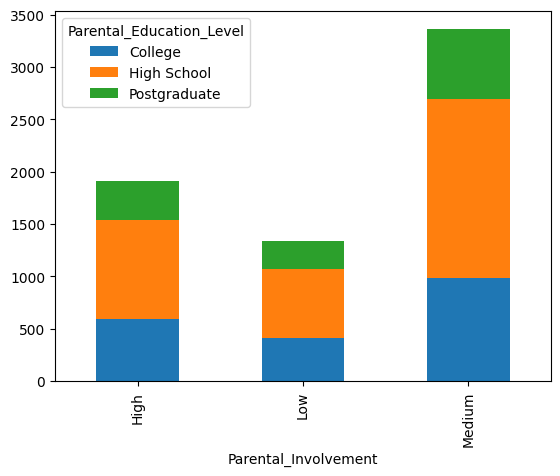

In [21]:
pd.crosstab(data["Parental_Involvement"], data["Parental_Education_Level"]).plot(kind="bar", stacked=True)
plt.show()

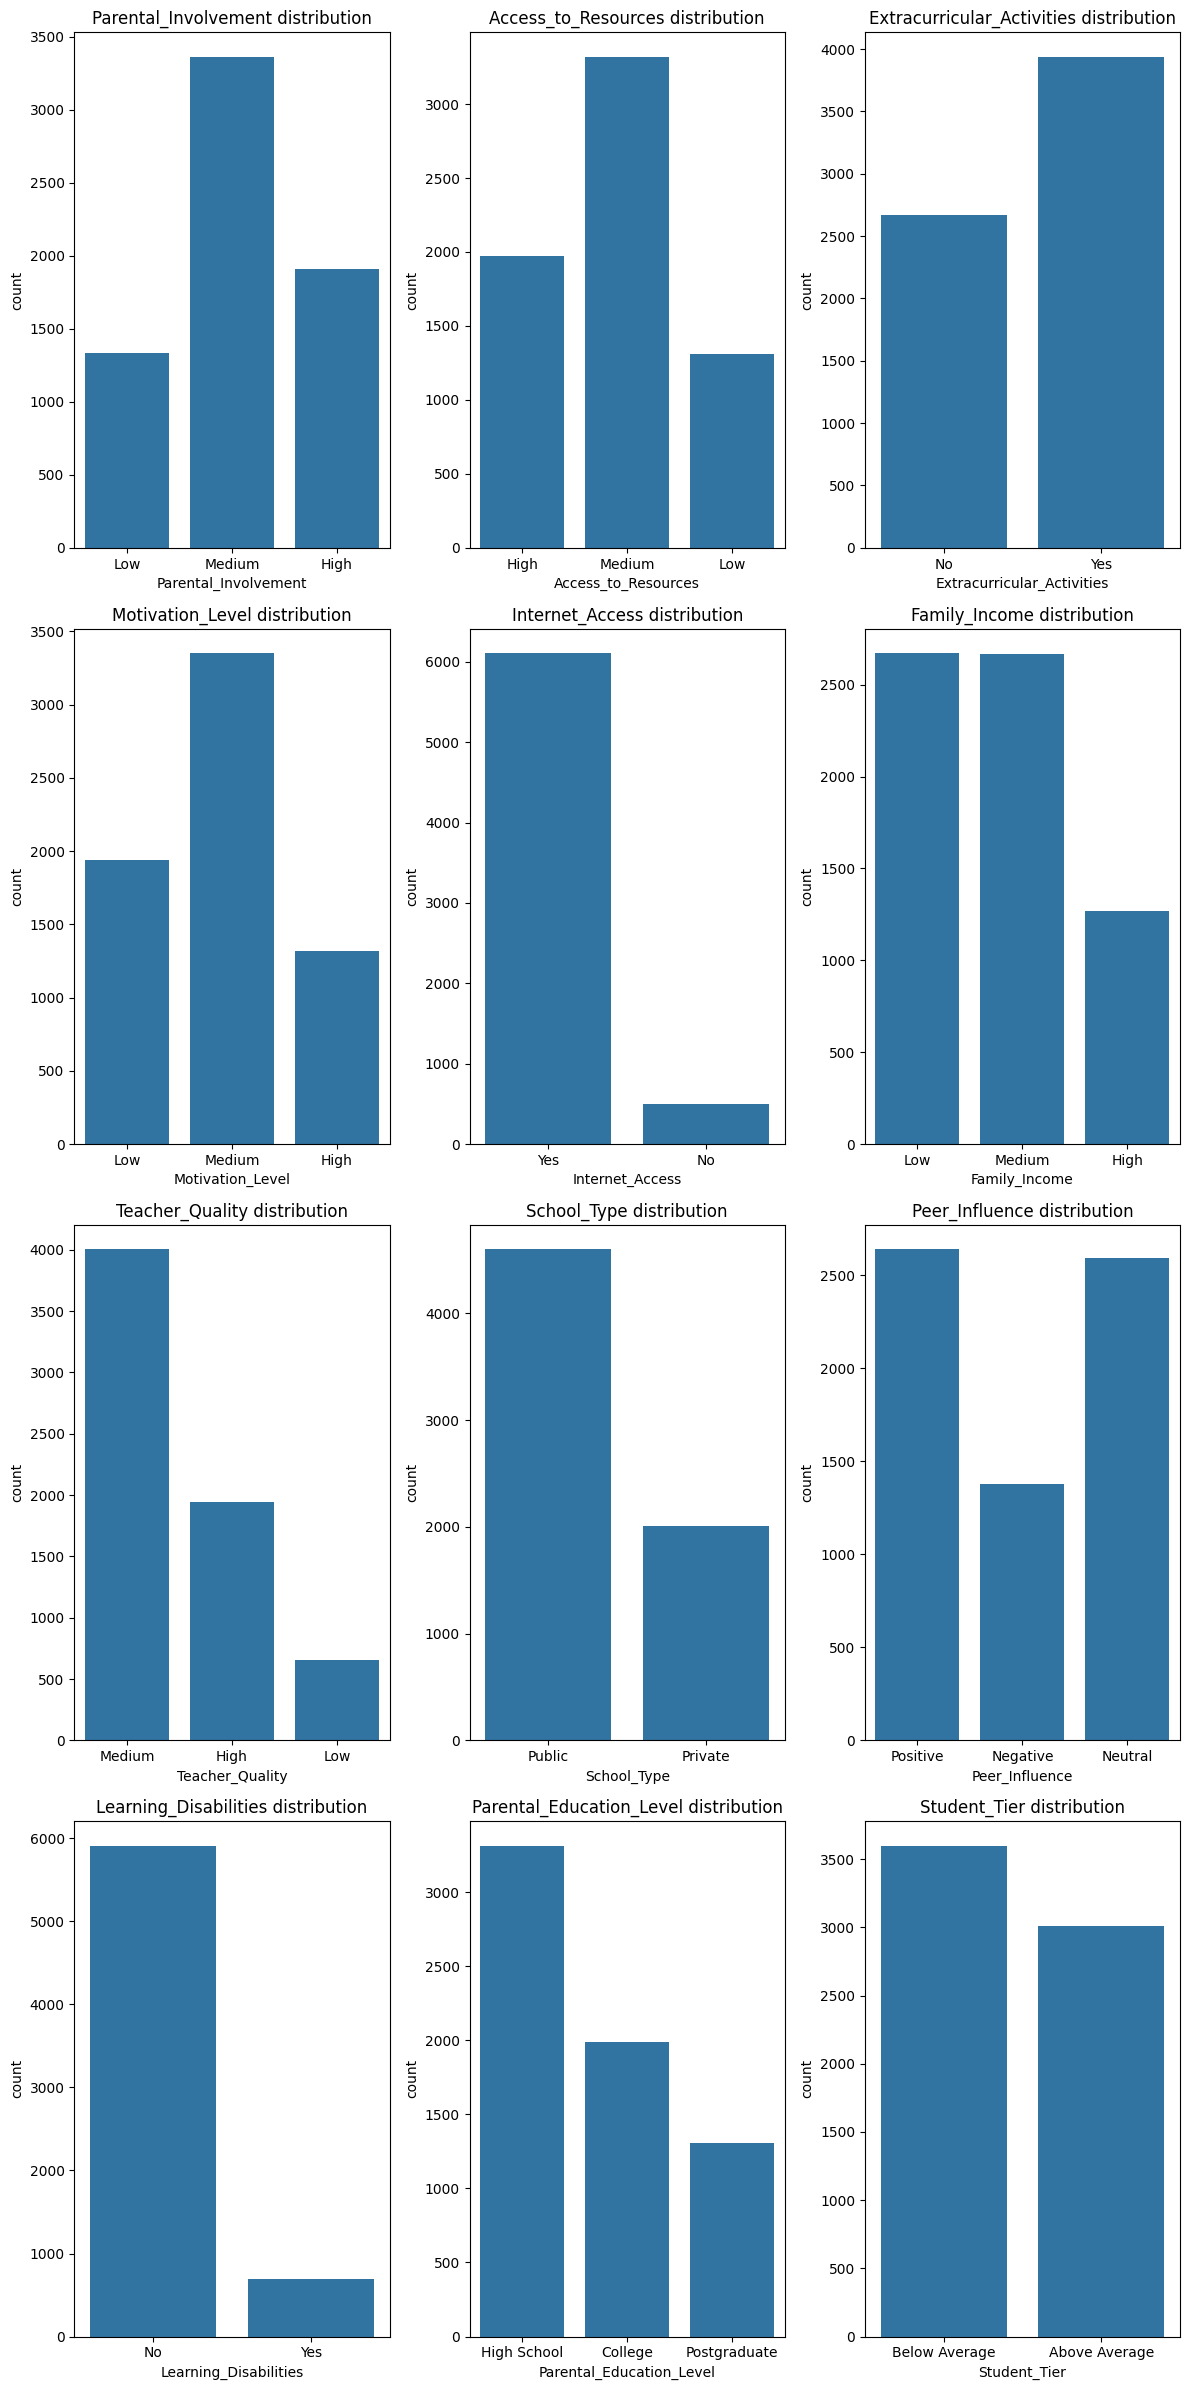

In [22]:
# Visualising Categorical Distribution

n_cols = 3  # Number of columns in the grid
n_rows = -(-len(category_data.columns) // n_cols)  # Calculate required rows (ceil division)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each categorical column
for i, col in enumerate(category_data):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

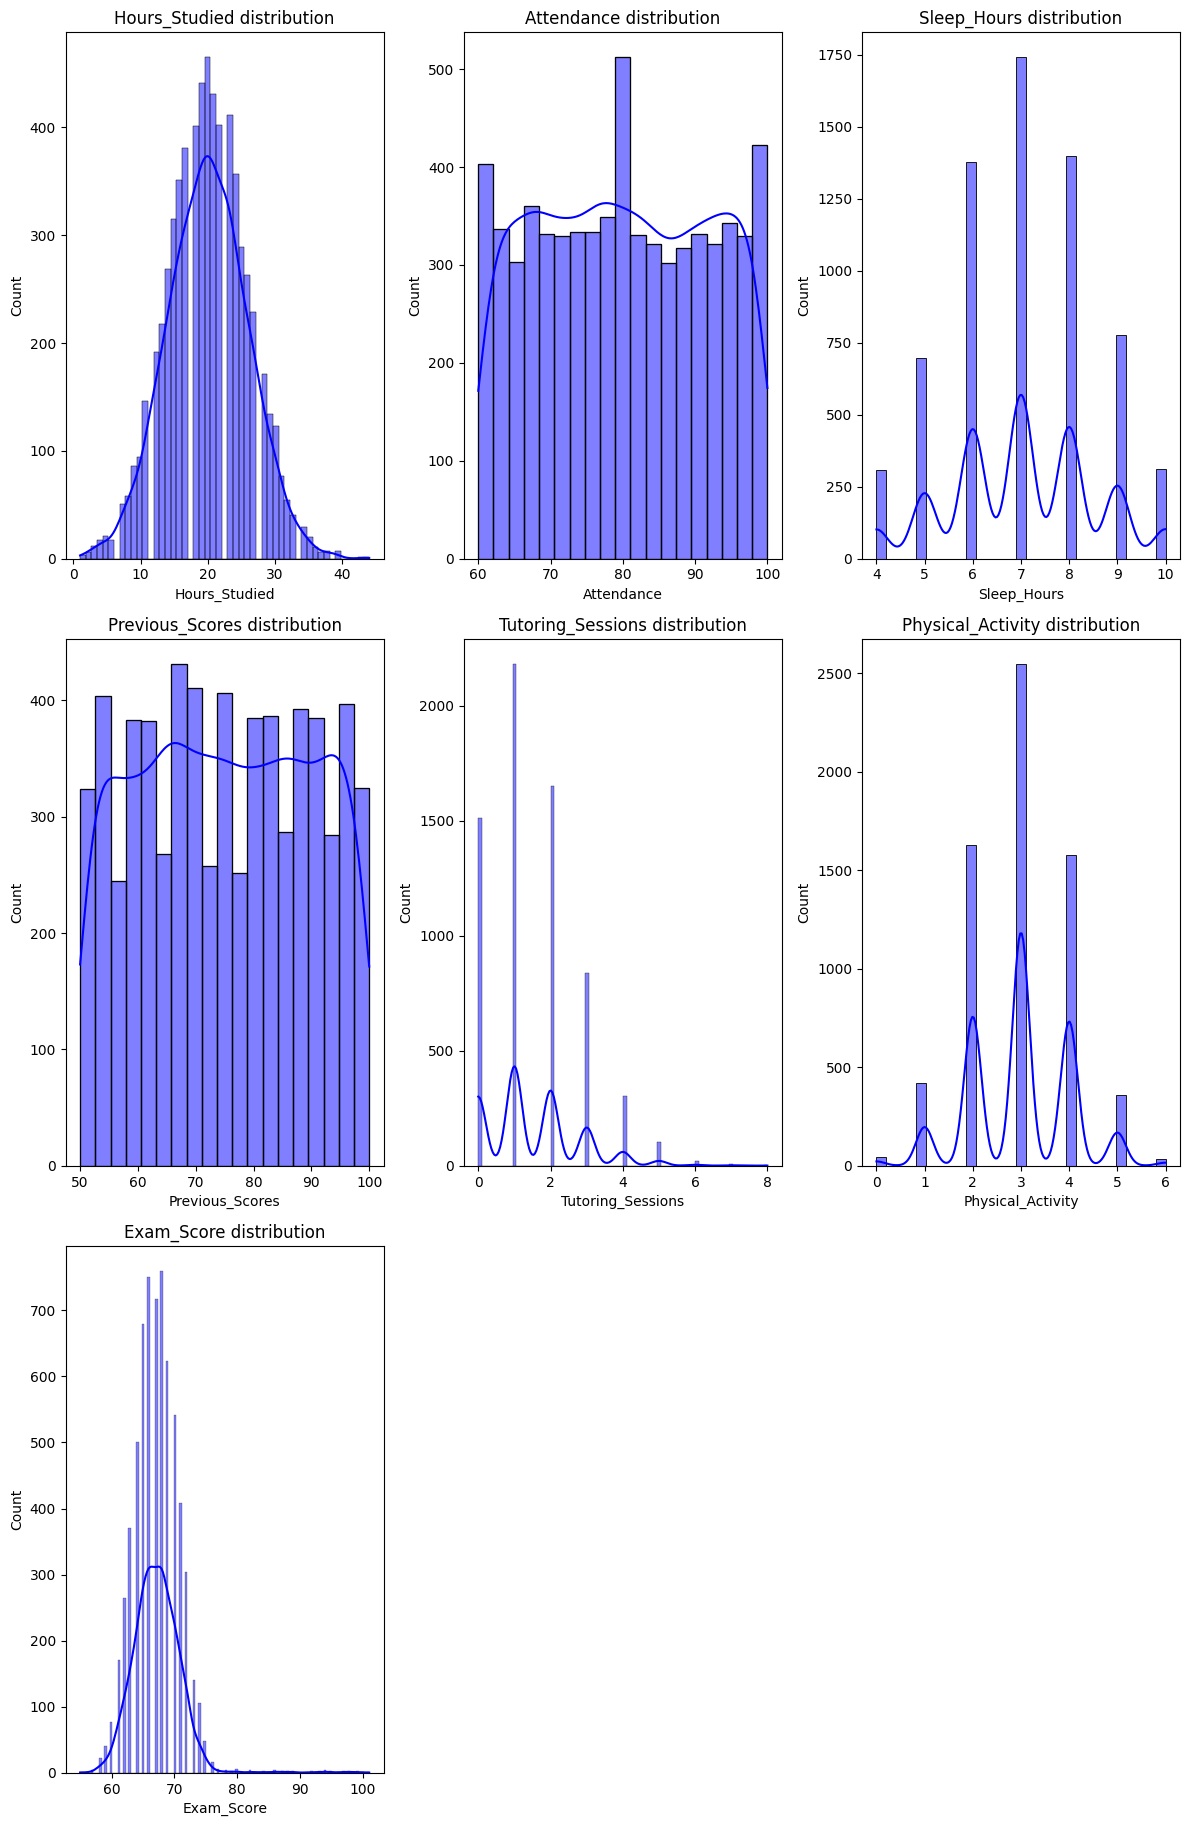

In [23]:
# Visualising Numerical Distribution

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(nums_data):
    sns.histplot(data=data, x=col, ax=axes[i], kde=True, color="b")
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

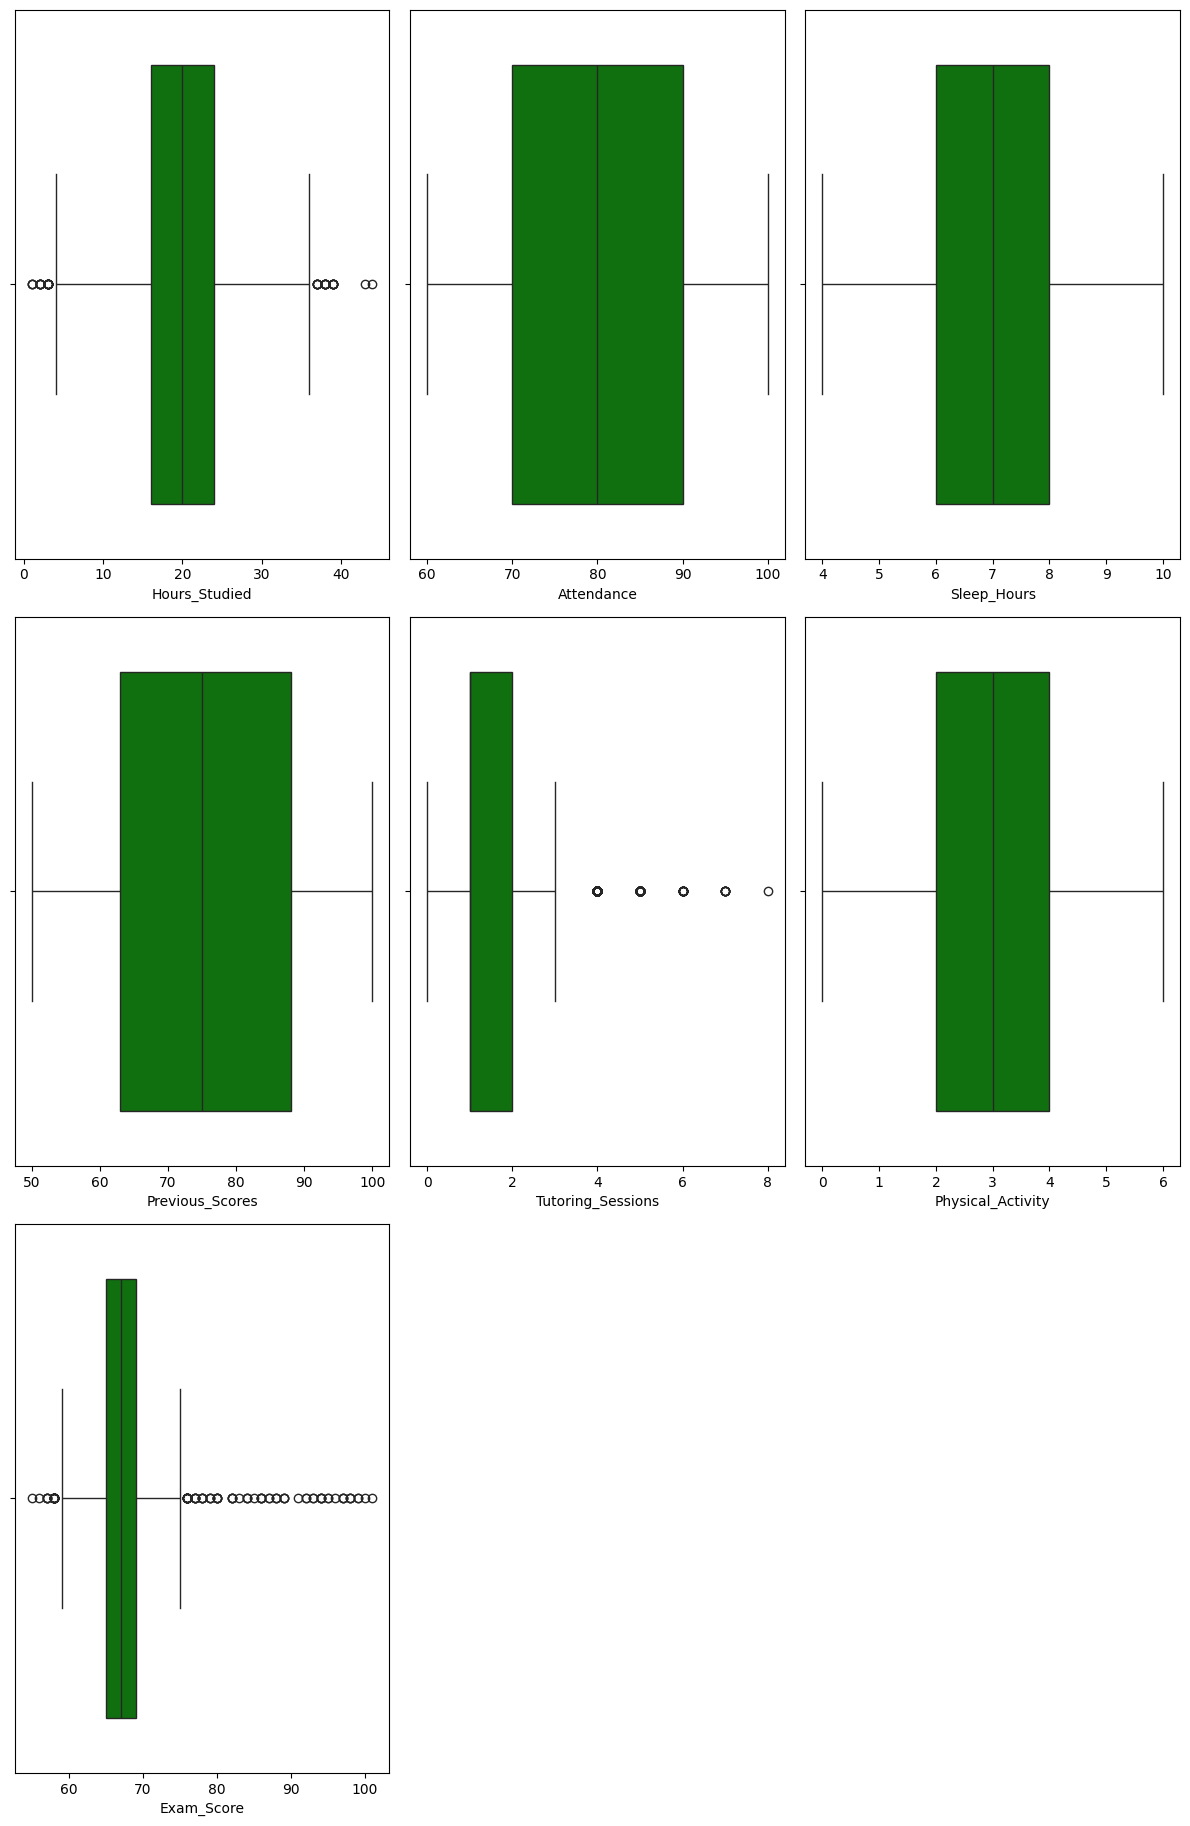

In [24]:
# Outliers in Numerical Features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(nums_data):
    sns.boxplot(x=data[col], ax=axes[i], color="green")

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

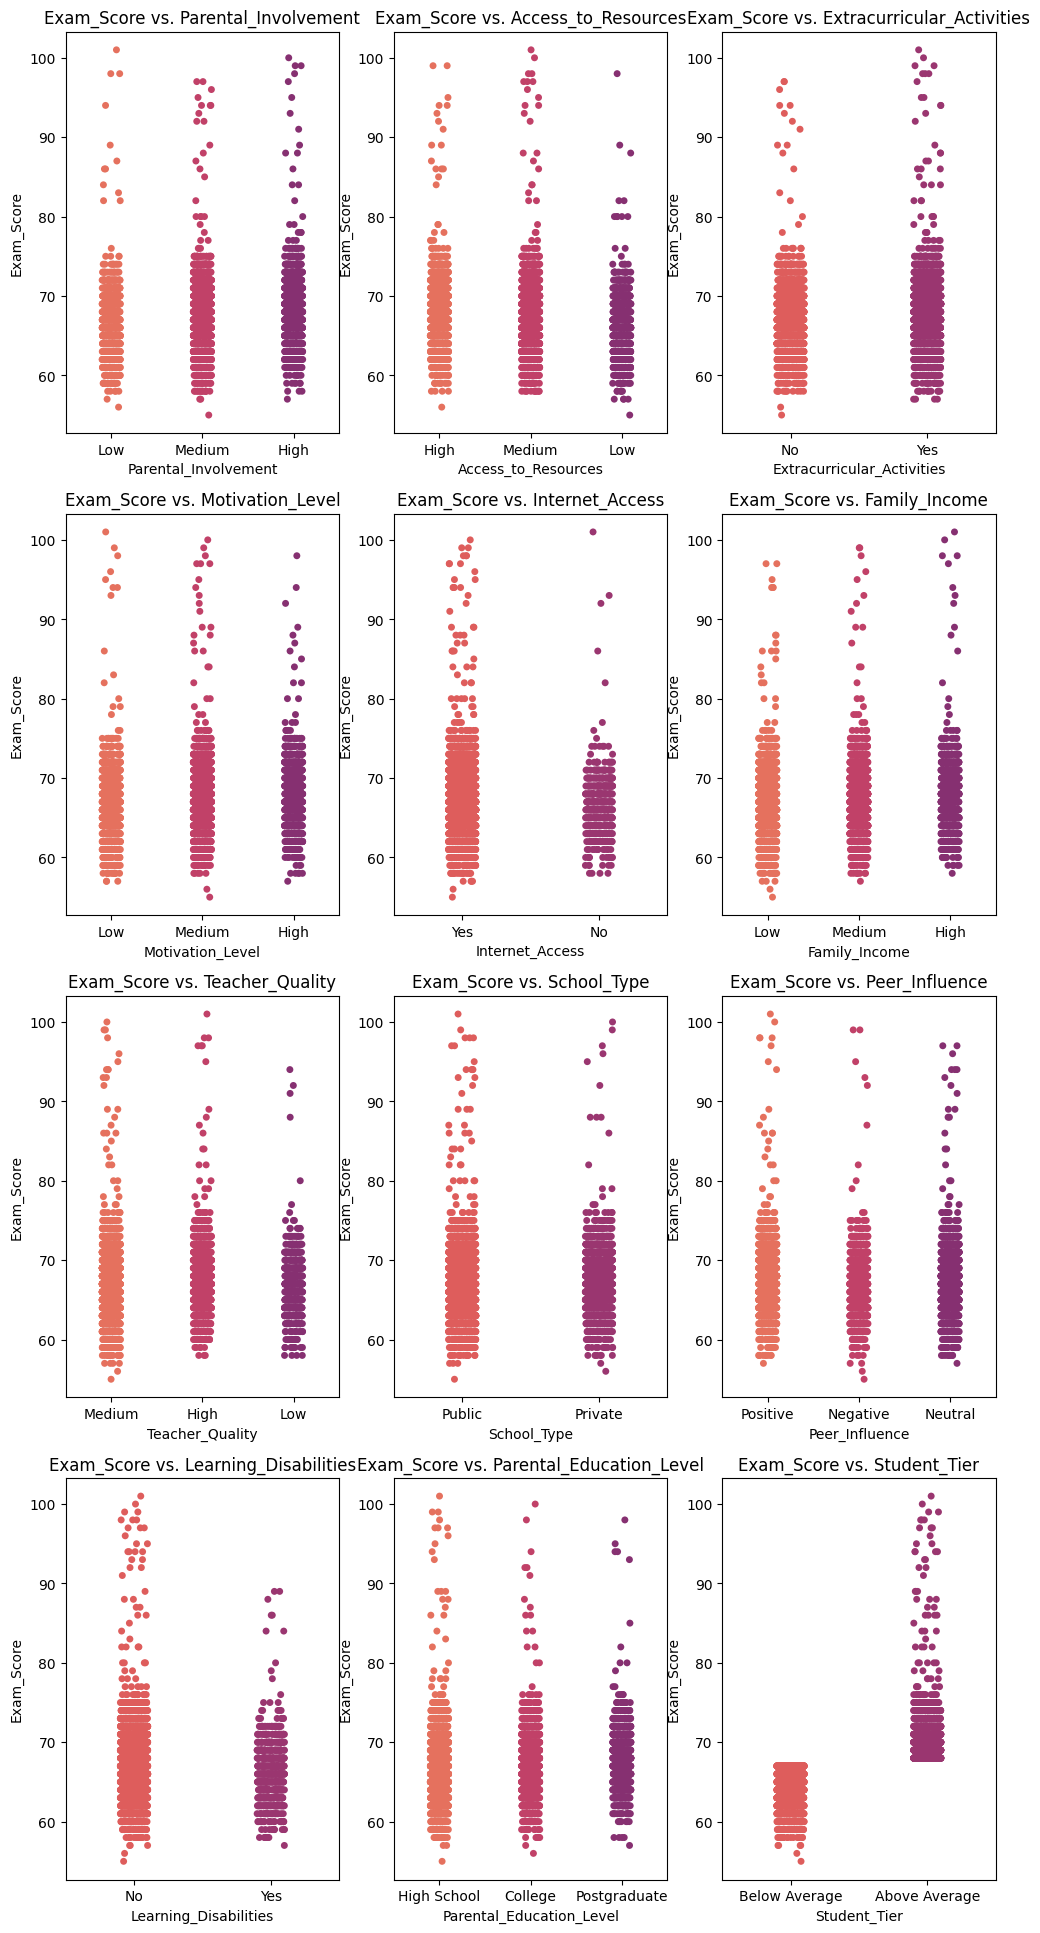

In [25]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()
target_col = "Exam_Score"

for i, col in enumerate(category_data):
    sns.stripplot(data=data, x=col, y=target_col, hue=col, ax=axes[i], palette='flare', legend=False)
    axes[i].set_title(f"{target_col} vs. {col}")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

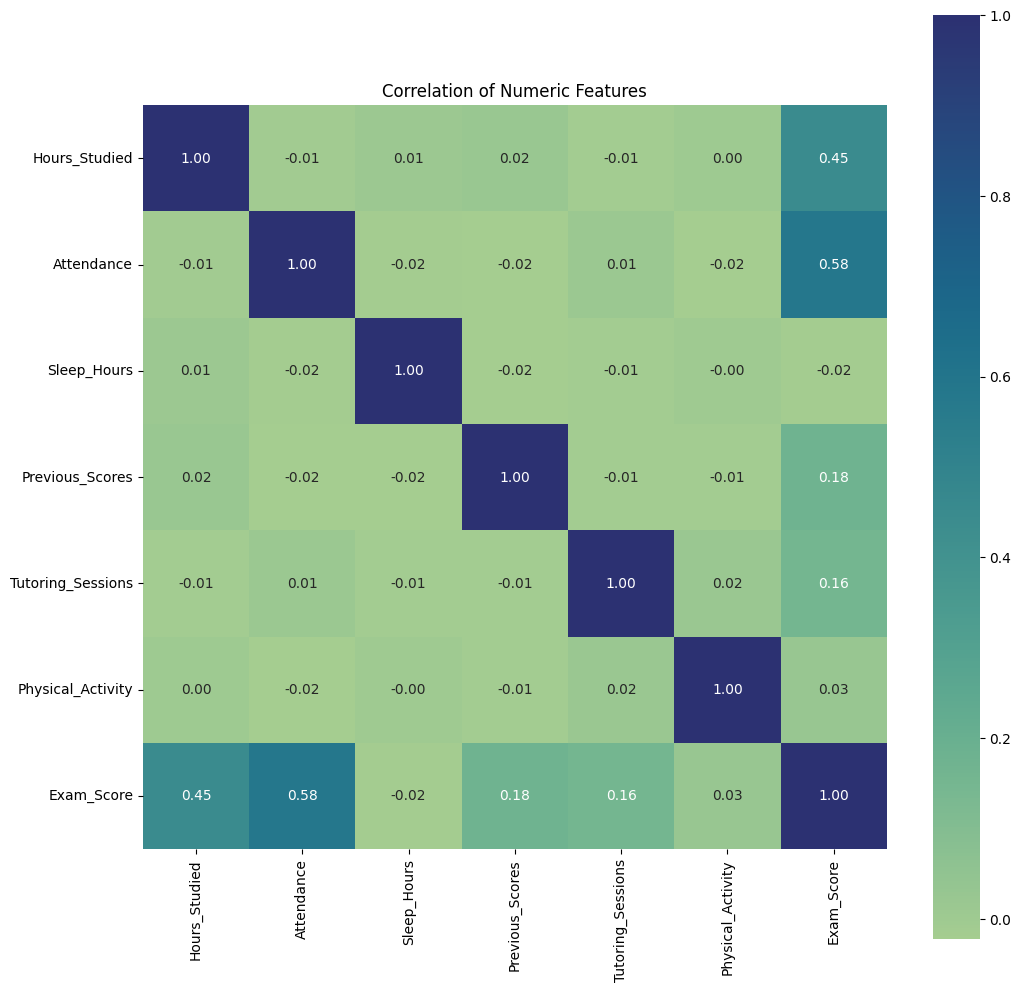

In [26]:
# Visualising correlation matrix for numerical features
plt.figure(figsize=(12, 12))
sns.heatmap(data=nums_data.corr(), cmap="crest", square=True, annot=True, cbar=True, fmt=".2f")
plt.title("Correlation of Numeric Features")

plt.show()

In [27]:
# Feature Engineering

In [28]:
category_data = category_data.drop("Student_Tier", axis=1)

In [29]:
# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(data[category_data.columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(category_data.columns))

In [30]:
nums_data.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [31]:
# Encode StudentTier label
label_encoder = LabelEncoder()
data["Student_Tier"] = label_encoder.fit_transform(data["Student_Tier"])  # Below Average = 0, Above Average = 1

# Combine numeric and encoded categorical data
nums_data = data.select_dtypes(include='number').columns.tolist()
nums_data.remove("Student_Tier")  # Ensure target column isn't included in features
final_df = pd.concat([data[nums_data], encoded_categorical_df, data["Student_Tier"]], axis=1)
final_df

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Student_Tier
0,23,84,7,73,0,3,67,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,19,64,8,59,2,4,61,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,24,98,7,91,2,4,74,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0
3,29,89,8,98,1,4,71,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,19,92,6,65,3,4,70,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
6603,23,76,8,81,3,2,69,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
6604,20,90,6,65,3,2,68,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
6605,10,86,6,91,2,3,68,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [32]:
# Train-Test Split

In [33]:
X = final_df.drop(["Student_Tier", "Exam_Score"], axis=1)
y = final_df["Student_Tier"]

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (4624, 24)
train size y :  (4624,)
test size X :  (1983, 24)
test size y :  (1983,)


In [35]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
#check for distribution of labels
y_train.value_counts(normalize=True)

,proportion
Student_Tier,
1,0.544983
0,0.455017


In [37]:
# Logistic Regression - Build the Model

In [38]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=800, C= 0.1, penalty= 'l2', solver='newton-cg')
model.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

Training Accuracy: 0.9578287197231834
Test Accuracy: 0.9641956631366616


In [39]:
# Check the distribution of classes
unique, counts = np.unique(y_train, return_counts=True)
print(f"Class distribution in training set: {dict(zip(unique, counts))}")


Class distribution in training set: {0: 2104, 1: 2520}


In [40]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate the model's performance
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.93948563 0.94856278 0.95382286 0.95306586 0.96214989]
Average cross-validation score: 0.9514174037227103


In [41]:
# Model Evaluation Metrics

In [42]:
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[ 869   35]
 [  36 1043]]


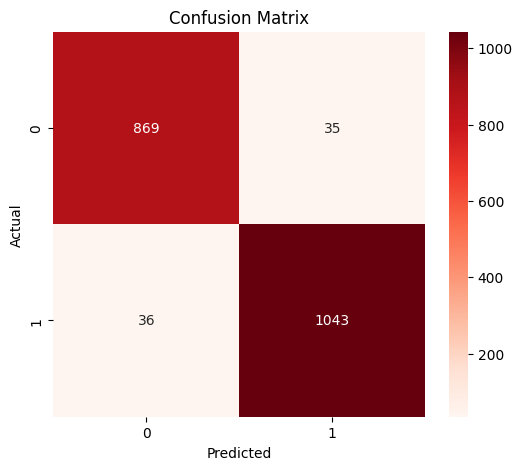

In [43]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
report = classification_report(y_test, y_test_pred)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       904
           1       0.97      0.97      0.97      1079

    accuracy                           0.96      1983
   macro avg       0.96      0.96      0.96      1983
weighted avg       0.96      0.96      0.96      1983



In [45]:
y_pred_prob_test = model.predict_proba(X_test)[:, 1]
print("ROC-AUC score  test dataset:  \t", roc_auc_score(y_test,y_pred_prob_test))

ROC-AUC score  test dataset:  	 0.99168867437073


In [46]:
# Tuning Hyperparameters

In [47]:
#Hyperparameter tuning
# define model/create instance
lr=LogisticRegression()
#specifying all hyperparameters with possible values
param_grid = {
    'C': [0.1, 0.5, 1, 10, 15],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet','none'],  # Type of regularization
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg'],  # Optimization algorithm
    'max_iter': [100, 500, 1000, 2000]
}



grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=4, scoring="f1", return_train_score=True)
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
800 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15],
                         'max_iter': [100, 500, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']},
             return_train_score=True, scoring='f1')

In [48]:
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [49]:
# Model Evaluation

In [50]:
best_model = grid_search.best_estimator_
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

In [51]:
print(f"Accuracy of the best model: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the best model: 0.9657085224407463
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       904
           1       0.97      0.97      0.97      1079

    accuracy                           0.97      1983
   macro avg       0.97      0.97      0.97      1983
weighted avg       0.97      0.97      0.97      1983



In [52]:
y_pred_prob_test = best_model.predict_proba(X_test)[:, 1]
print("ROC-AUC score  test dataset:  \t", roc_auc_score(y_test,y_pred_prob_test))

ROC-AUC score  test dataset:  	 0.9918332280790965


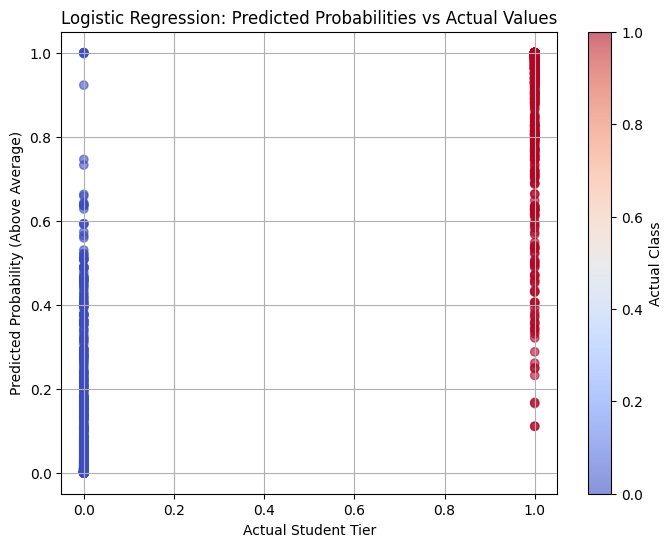

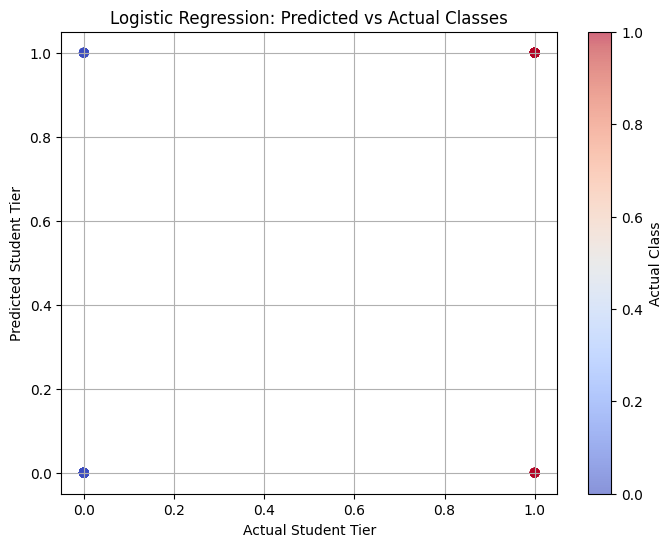

In [53]:
# Scatter plot of predicted probabilities vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_prob_test, alpha=0.6, c=y_test, cmap='coolwarm')
plt.xlabel('Actual Student Tier')
plt.ylabel('Predicted Probability (Above Average)')
plt.title('Logistic Regression: Predicted Probabilities vs Actual Values')
plt.colorbar(label='Actual Class')
plt.grid(True)
plt.show()

# Scatter plot of predicted classes vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, c=y_test, cmap='coolwarm')
plt.xlabel('Actual Student Tier')
plt.ylabel('Predicted Student Tier')
plt.title('Logistic Regression: Predicted vs Actual Classes')
plt.colorbar(label='Actual Class')
plt.grid(True)
plt.show()

In [54]:
#Droping Features and comparing accuracy with Logistic Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
dropped_features = ["Hours_Studied", "Attendance", "Previous_Scores", "Sleep_Hours"]
X = final_df.drop(columns=["Student_Tier"] + dropped_features)
y = final_df["Student_Tier"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
reduced_model = LogisticRegression(max_iter=800, C=0.1, penalty='l2', solver='newton-cg')
reduced_model.fit(X_train_scaled, y_train)
y_test_pred = reduced_model.predict(X_test_scaled)

# Evaluate the reduced model
reduced_accuracy = accuracy_score(y_test, y_test_pred)
reduced_report = classification_report(y_test, y_test_pred)

print(f"Reduced Model Accuracy: {reduced_accuracy}")
print("Classification Report:\n", reduced_report)


Reduced Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00      1079

    accuracy                           1.00      1983
   macro avg       1.00      1.00      1.00      1983
weighted avg       1.00      1.00      1.00      1983



In [56]:
# Decision Tree

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Define features and target
dropped_features = ["Hours_Studied", "Attendance", "Previous_Scores", "Sleep_Hours"]
X = final_df.drop(columns=["Student_Tier"] + dropped_features)
y = final_df["Student_Tier"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)
y_test_pred_dt = decision_tree_model.predict(X_test_scaled)

In [59]:
# Evaluate the decision tree model
decision_tree_accuracy = accuracy_score(y_test, y_test_pred_dt)
decision_tree_precision = precision_score(y_test, y_test_pred_dt, average='binary')
decision_tree_recall = recall_score(y_test, y_test_pred_dt, average='binary')
decision_tree_f1 = f1_score(y_test, y_test_pred_dt, average='binary')
decision_tree_report = classification_report(y_test, y_test_pred_dt)

print(f"Decision Tree Model Accuracy: {decision_tree_accuracy:.2%}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"F1-score: {decision_tree_f1:.2f}")
print("Classification Report:\n", decision_tree_report)

Decision Tree Model Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00      1079

    accuracy                           1.00      1983
   macro avg       1.00      1.00      1.00      1983
weighted avg       1.00      1.00      1.00      1983



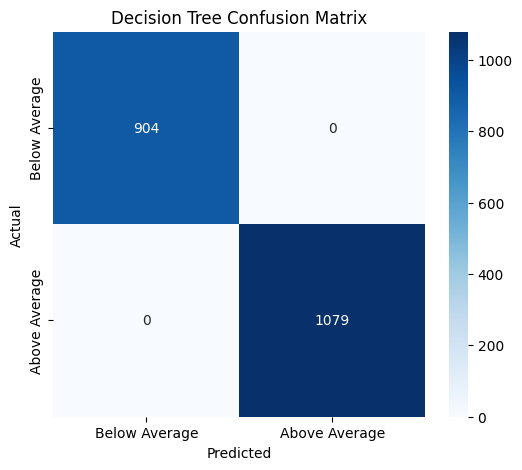

In [60]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Average', 'Above Average'], yticklabels=['Below Average', 'Above Average'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


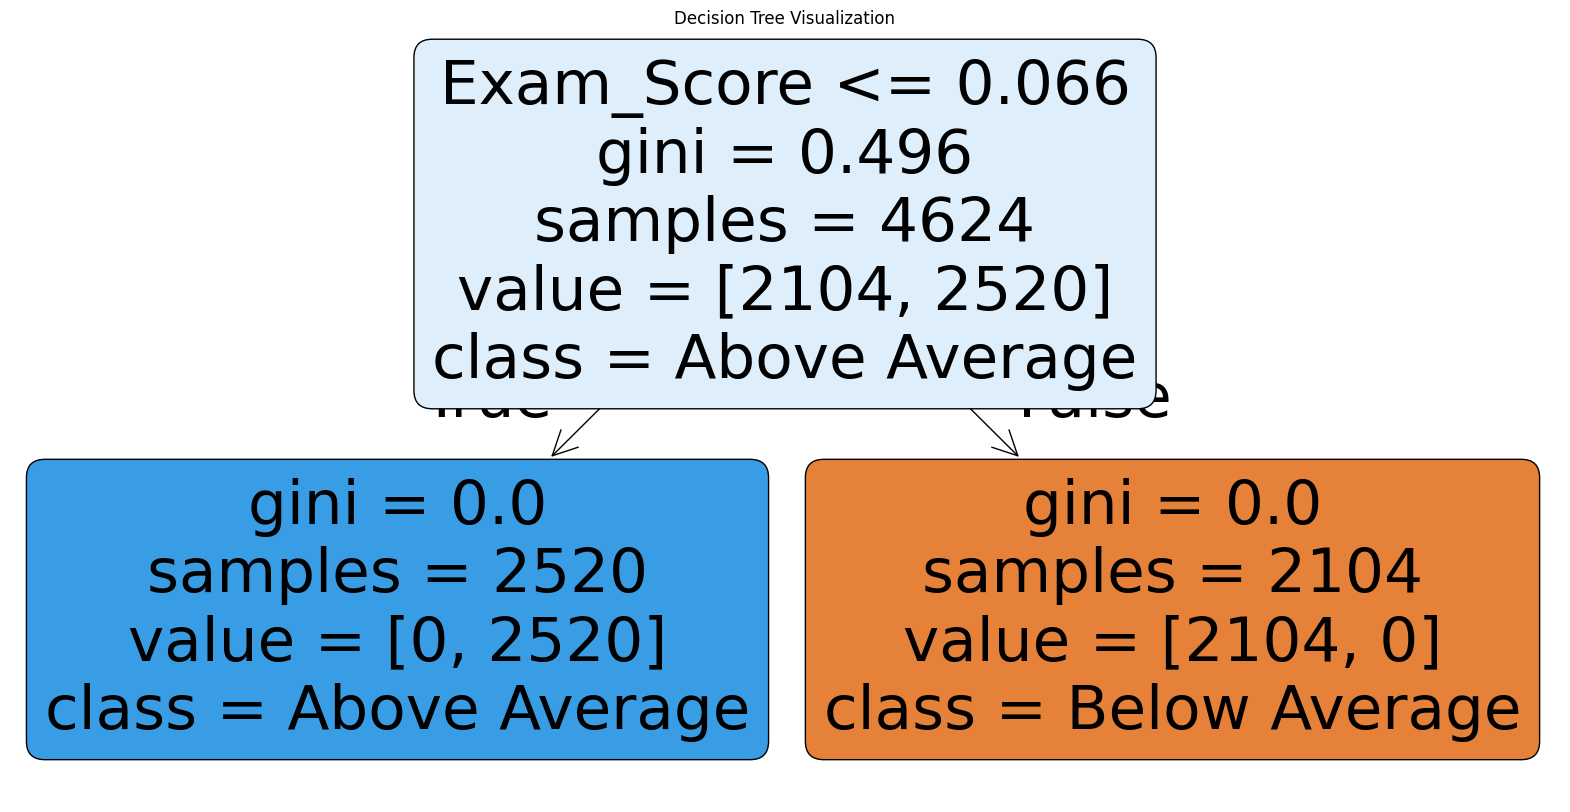

In [61]:
# Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['Below Average', 'Above Average'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [62]:
# Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [63]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test_scaled)

best_accuracy = accuracy_score(y_test, y_test_pred_best)
print(f"Accuracy of the best model: {best_accuracy:.2%}")


Accuracy of the best model: 100.00%


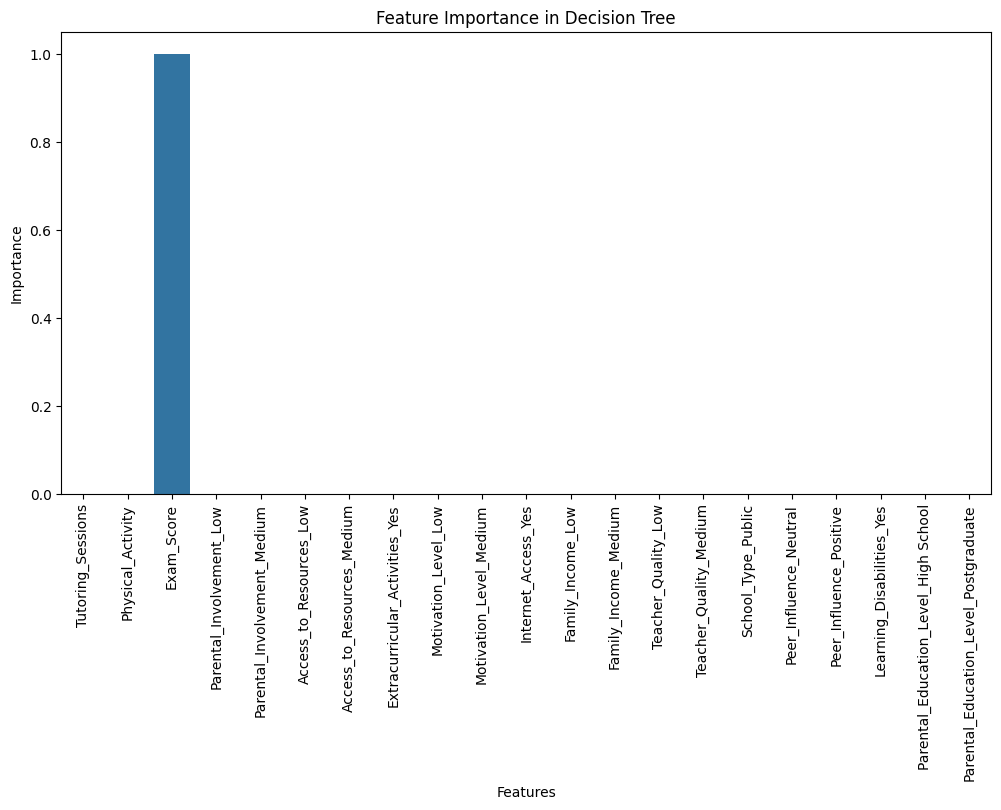

In [64]:
# Feature Importance Analysis
feature_importances = best_model.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.xticks(rotation=90)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [65]:
# Random Forest

In [66]:
# Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_test_pred = random_forest_model.predict(X_test_scaled)

# Evaluate the random forest model
random_forest_accuracy = accuracy_score(y_test, y_test_pred)
random_forest_report = classification_report(y_test, y_test_pred)

print(f"Random Forest Model Accuracy: {random_forest_accuracy:.2%}")
print("Classification Report:\n", random_forest_report)



Random Forest Model Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00      1079

    accuracy                           1.00      1983
   macro avg       1.00      1.00      1.00      1983
weighted avg       1.00      1.00      1.00      1983



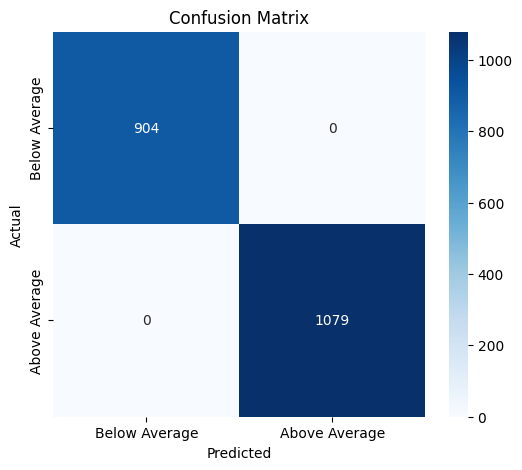

In [67]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Average', 'Above Average'], yticklabels=['Below Average', 'Above Average'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



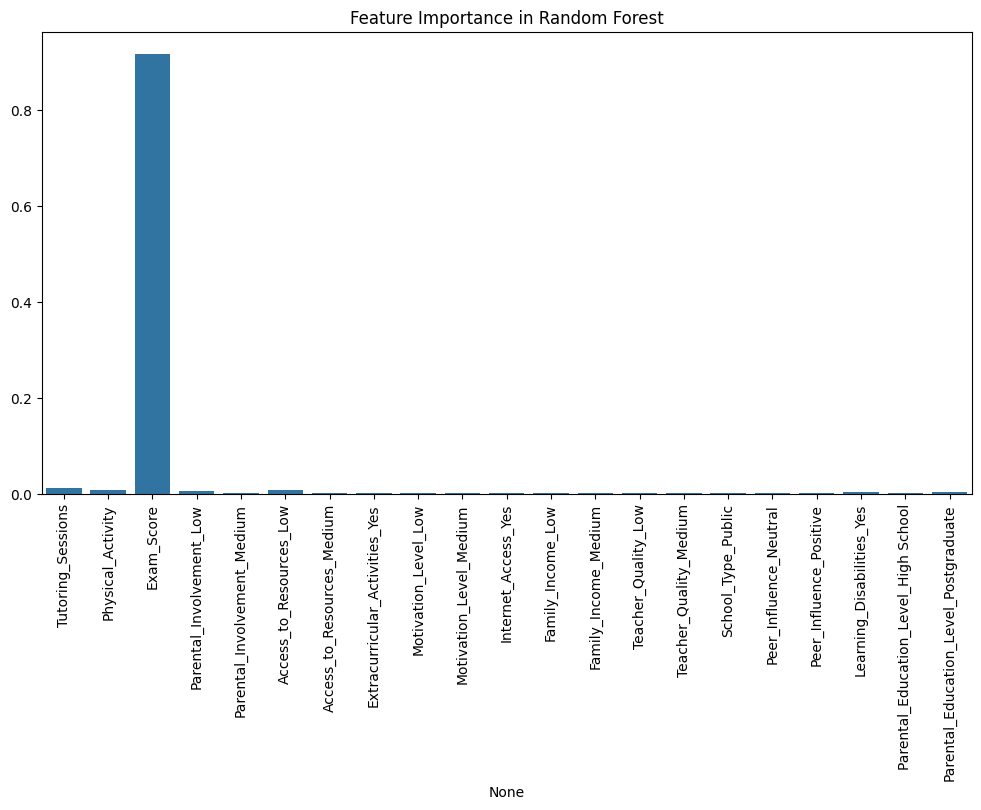

In [68]:
# Feature Importance
feature_importances = random_forest_model.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.xticks(rotation=90)
plt.title('Feature Importance in Random Forest')
plt.show()


In [69]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [70]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [71]:
# Stochastic Gradient Descent (SGD)

In [72]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier

# Define parameter grid for tuning
param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(SGDClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

Best hyperparameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}


In [73]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_test_pred_best)
print(f"Accuracy of the best model: {best_accuracy:.2%}")



Accuracy of the best model: 100.00%


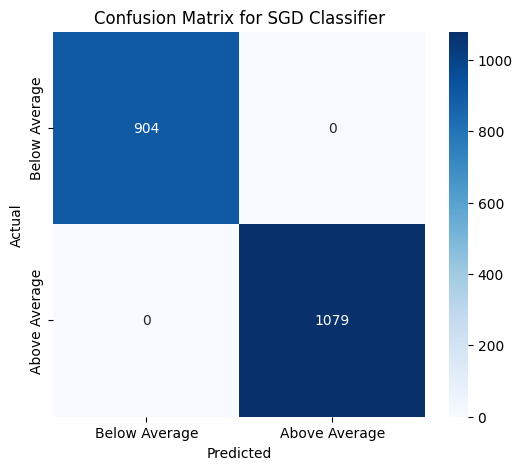

In [74]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Average', 'Above Average'], yticklabels=['Below Average', 'Above Average'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SGD Classifier')
plt.show()


In [75]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_test_pred_best))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00      1079

    accuracy                           1.00      1983
   macro avg       1.00      1.00      1.00      1983
weighted avg       1.00      1.00      1.00      1983



In [ ]:
# Support Vector Machine (SVM)

In [76]:
from sklearn.svm import SVC

# Define parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}


In [77]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")


Best hyperparameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [78]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_test_pred_best)
print(f"Accuracy of the best model: {best_accuracy:.2%}")


Accuracy of the best model: 100.00%


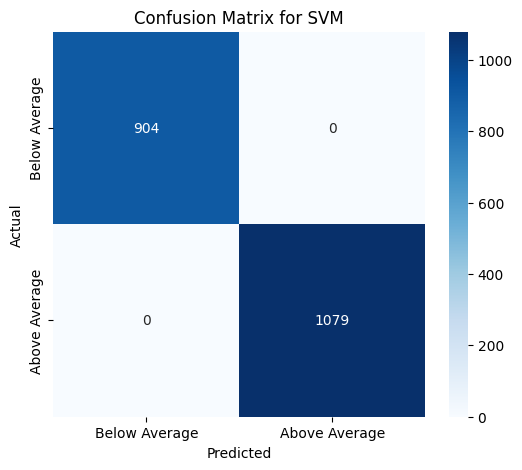

In [79]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Average', 'Above Average'], yticklabels=['Below Average', 'Above Average'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

In [80]:

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_test_pred_best))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00      1079

    accuracy                           1.00      1983
   macro avg       1.00      1.00      1.00      1983
weighted avg       1.00      1.00      1.00      1983



In [ ]:
# GridSearchCV

In [81]:
# Define parameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'SGD': {
        'loss': ['hinge', 'log_loss', 'modified_huber'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [1000, 3000]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    }
}


In [82]:

# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SGD': SGDClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}



Logistic Regression - Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression - Accuracy of the best model: 100.00%


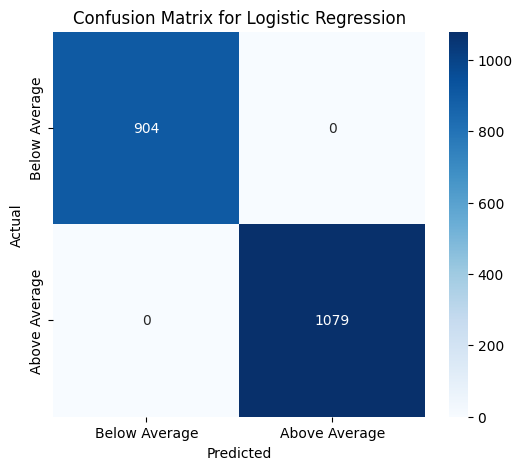

Decision Tree - Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Decision Tree - Accuracy of the best model: 100.00%


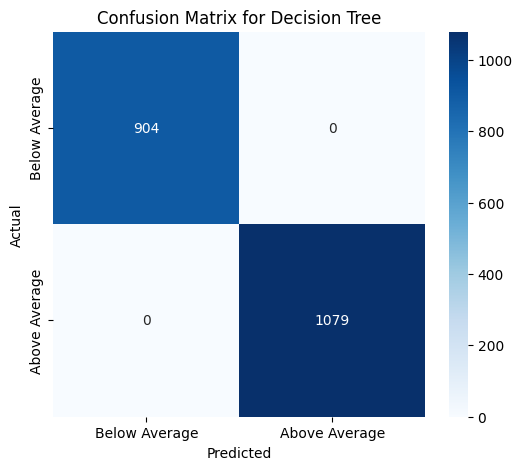

Random Forest - Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - Accuracy of the best model: 100.00%


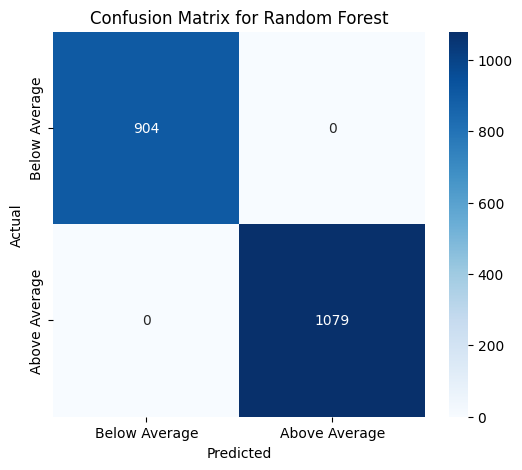

SGD - Best hyperparameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}
SGD - Accuracy of the best model: 100.00%


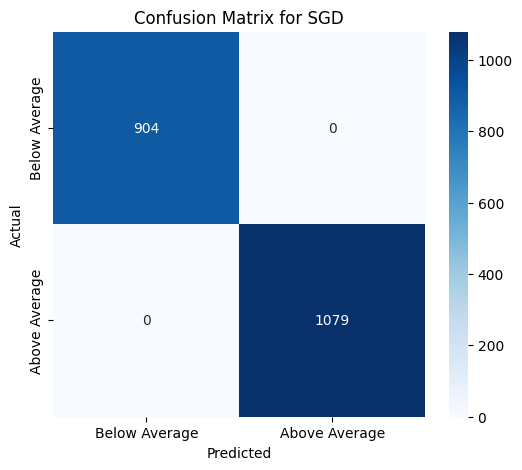

SVM - Best hyperparameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
SVM - Accuracy of the best model: 100.00%


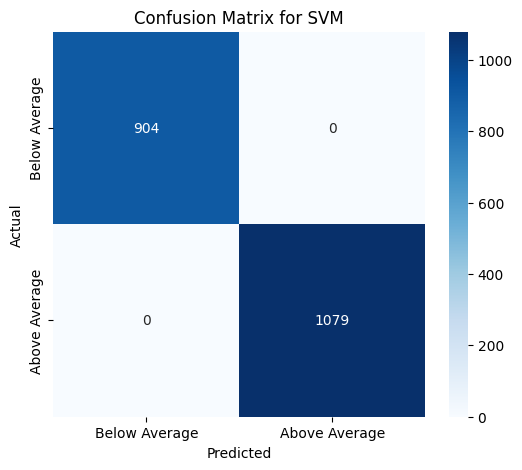

In [83]:
# Perform grid search for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    print(f"{model_name} - Best hyperparameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    y_test_pred_best = best_model.predict(X_test_scaled)
    best_accuracy = accuracy_score(y_test, y_test_pred_best)
    print(f"{model_name} - Accuracy of the best model: {best_accuracy:.2%}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred_best)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Average', 'Above Average'], yticklabels=['Below Average', 'Above Average'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()



In [85]:
  # Classification Report
print(f"{model_name} Classification Report:\n", classification_report(y_test, y_test_pred_best))


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00      1079

    accuracy                           1.00      1983
   macro avg       1.00      1.00      1.00      1983
weighted avg       1.00      1.00      1.00      1983

